# Plots

## General

### Imports

In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

import copy
import pickle
import builtins
import numpy as np
import torch
import matplotlib.pyplot as plt

import ToyExample.toy_example as toy

%load_ext autoreload
%autoreload 2

### Parameters

In [15]:
# Network parameters
classes='A'
num_layers=4
hidden_dim=64
batch_size=4<<10
total_iter=4<<10
ema_path = os.path.join(dirs.MODELS_HOME, "ToyExample", "18_Statistics", "NoACID_seed_000", "iter4096.pkl")

# Distribution parameters
P_mean=-2.3
P_std=1.5
sigma_data=0.5
sigma_max=5
lr_ref=1e-2
lr_iter=512
ema_std=0.010

# Guidance parameters
guidance=False
guidance_weight=3
guide_path=os.path.join(dirs.MODELS_HOME, "ToyExample", "10_EarlyStopACID", "Ref", "iter0512.pkl")
guide_interpolation=False

# ACID parameters
acid=False
acid_n=16
acid_f=0.8
acid_diff=True
acid_inverted=False

# Training parameters
val_batch_size=4<<7
test_batch_size=4<<8

# Other parameters
device=torch.device('cuda')
fig1_kwargs = dict(view_x=0.30, view_y=0.30, view_size=1.2, device=device)
fig2_kwargs = dict(view_x=0.45, view_y=1.22, view_size=0.3, device=device)#, sample_distance=0.045, sigma_max=0.03)
seed=0

In [4]:
# Set random seed, if specified
if seed is not None:
    print("Seed = ", seed)
    torch.manual_seed(seed)
    generator = torch.Generator(device).manual_seed(seed)
    np.random.seed(seed)

Seed =  0


In [5]:
guide_path

'/mnt/hdd/vale/models/SCID/ToyExample/10_EarlyStopACID/Ref/iter0512.pkl'

In [17]:
# Initialize models
net = toy.ToyModel(num_layers=num_layers, hidden_dim=hidden_dim, sigma_data=sigma_data).to(device).train().requires_grad_(True)
ema = copy.deepcopy(net).eval().requires_grad_(False)
opt = torch.optim.Adam(net.parameters(), betas=(0.9, 0.99))
if ema_path is not None:
    with builtins.open(guide_path, "rb") as f:
        ema = pickle.load(f).to(device)
    print("EMA model loaded from", ema_path)
if guide_path is not None:
    with builtins.open(guide_path, "rb") as f:
        guide = pickle.load(f).to(device)
    print("Guide model loaded from", guide_path)
else:
    guide = None
if guidance and acid:
    ref = guide
    print("Guide model assigned as ACID reference")
elif acid: 
    ref = ema
    print("EMA assigned as ACID reference")
else: ref = None

EMA model loaded from /mnt/hdd/vale/models/SCID/ToyExample/18_Statistics/NoACID_seed_000/iter4096.pkl
Guide model loaded from /mnt/hdd/vale/models/SCID/ToyExample/10_EarlyStopACID/Ref/iter0512.pkl


## Plots

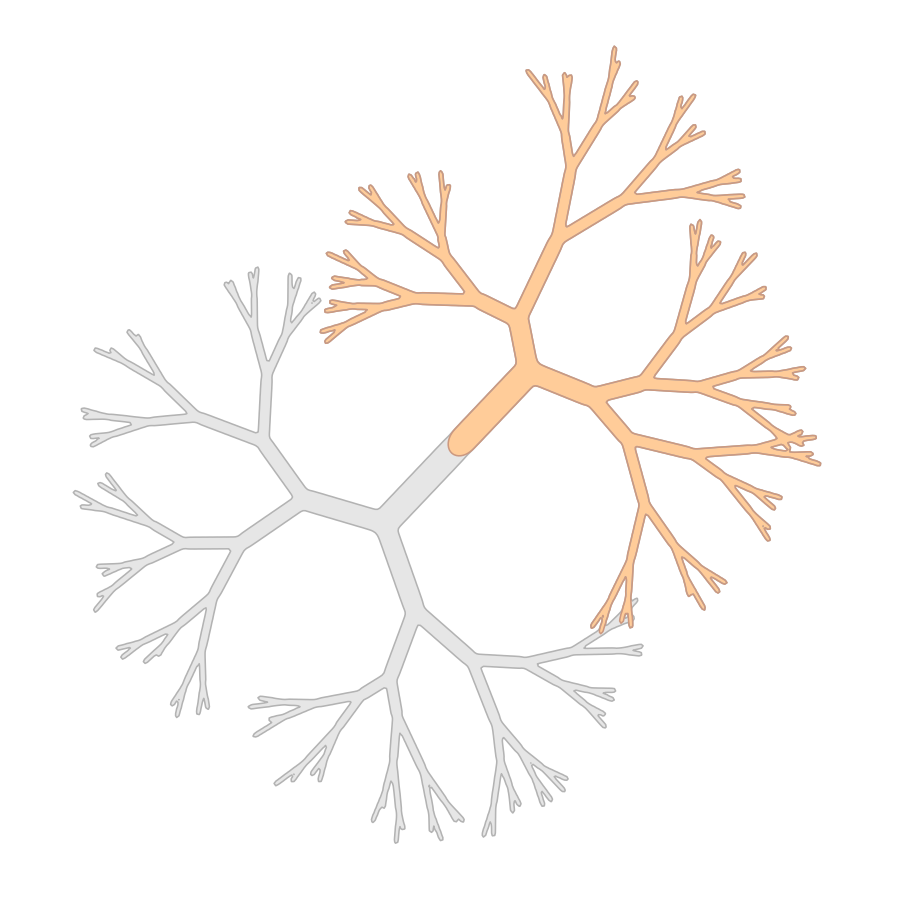

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_uncond', 'gt_outline'}, device=device, ax=ax)

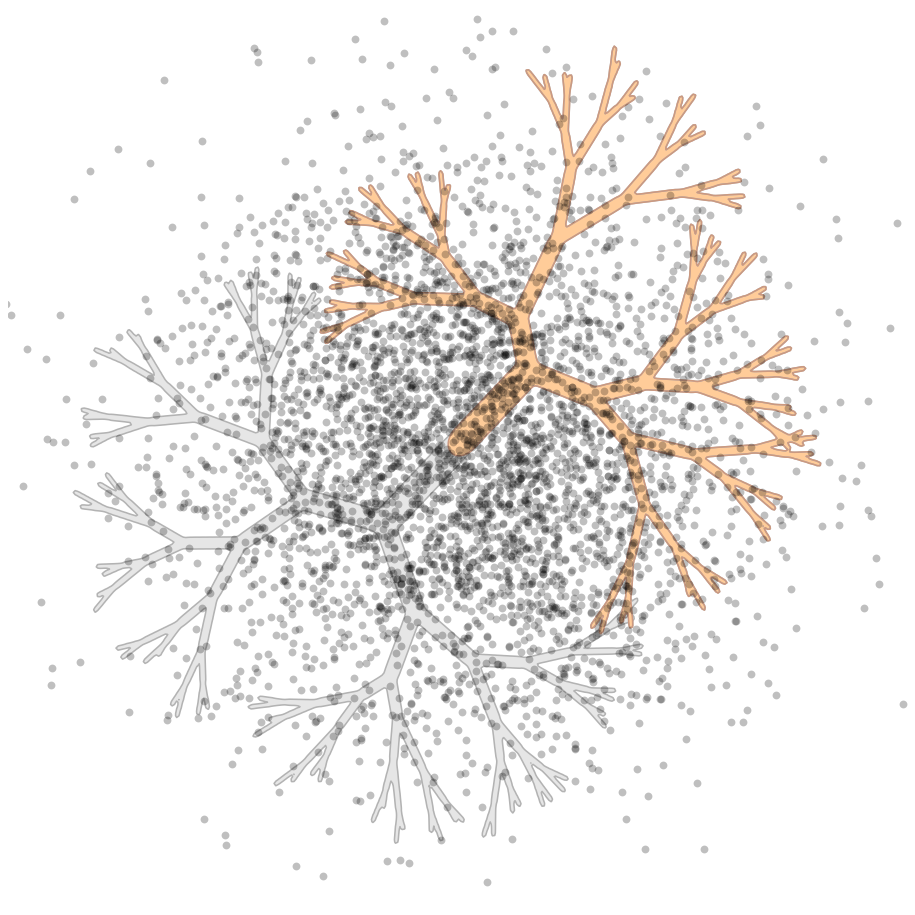

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples','gt_uncond', 'gt_outline'}, 
            sigma_max=sigma_max, device=device, num_samples=1<<12, ax=ax)

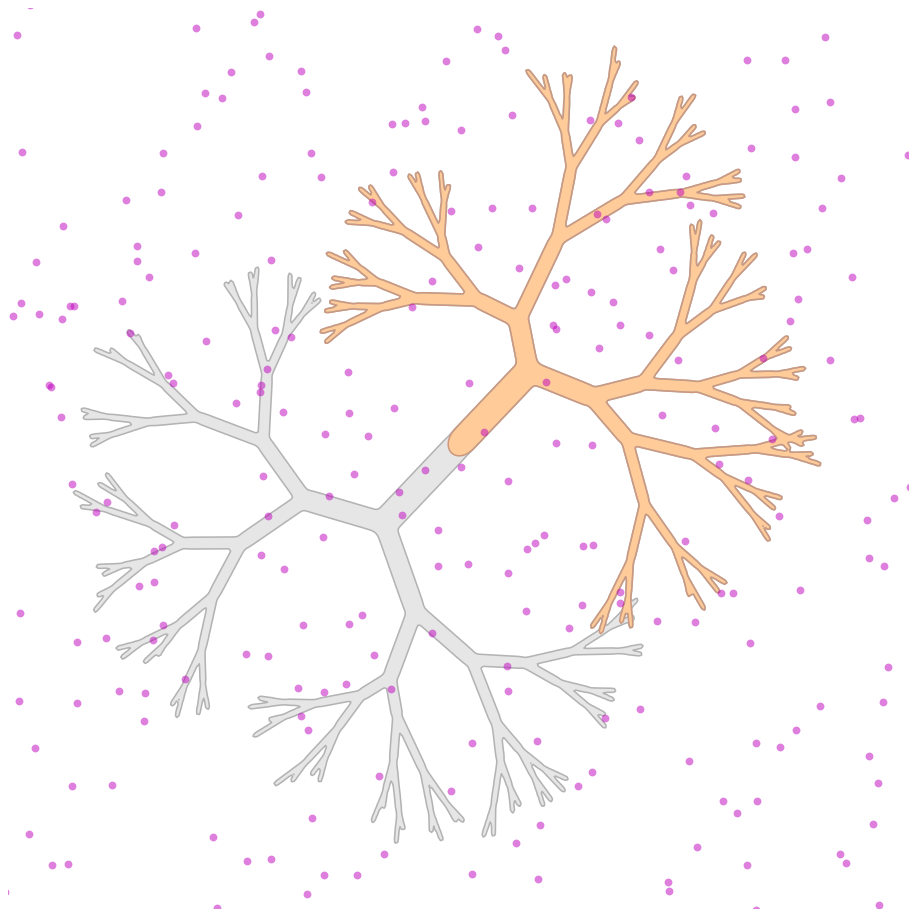

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples_before_small','gt_uncond', 'gt_outline'}, num_samples=1<<12, ax=ax)

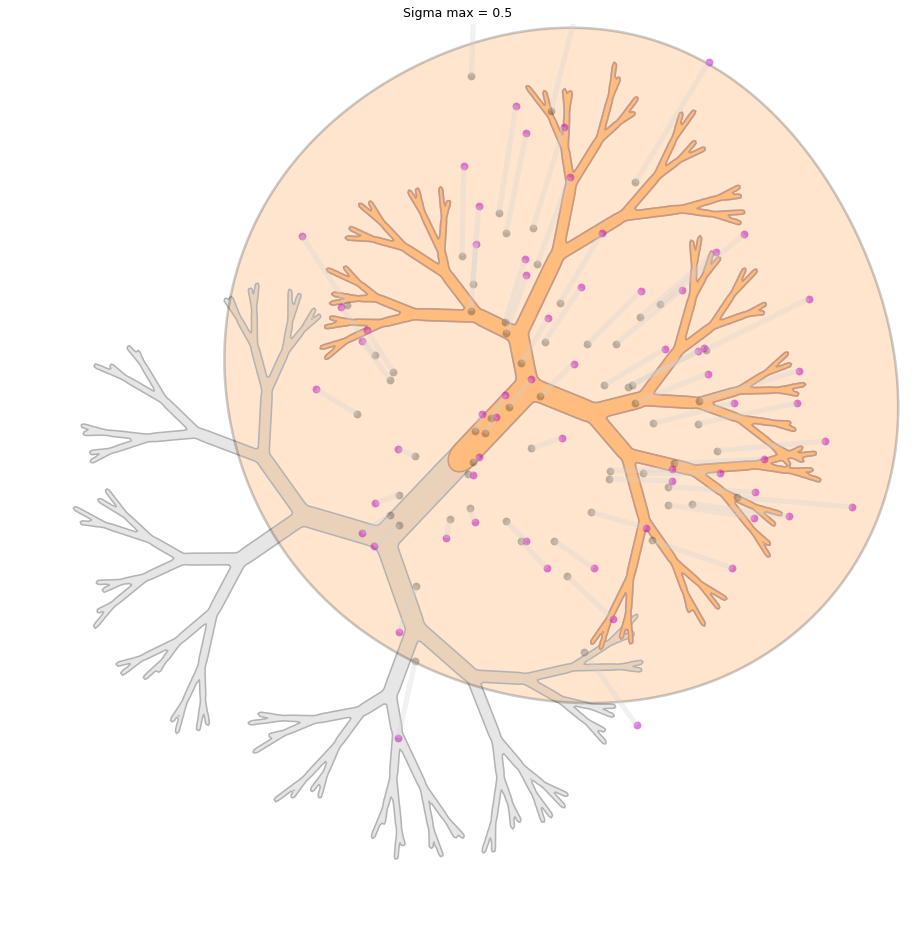

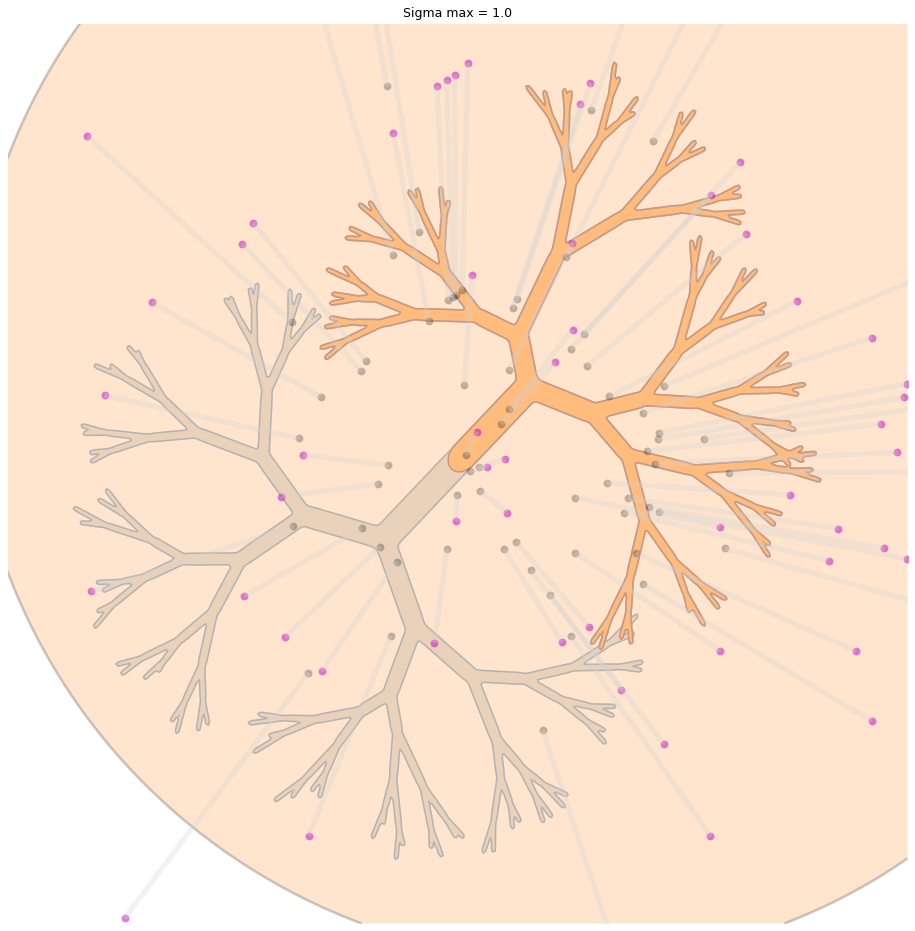

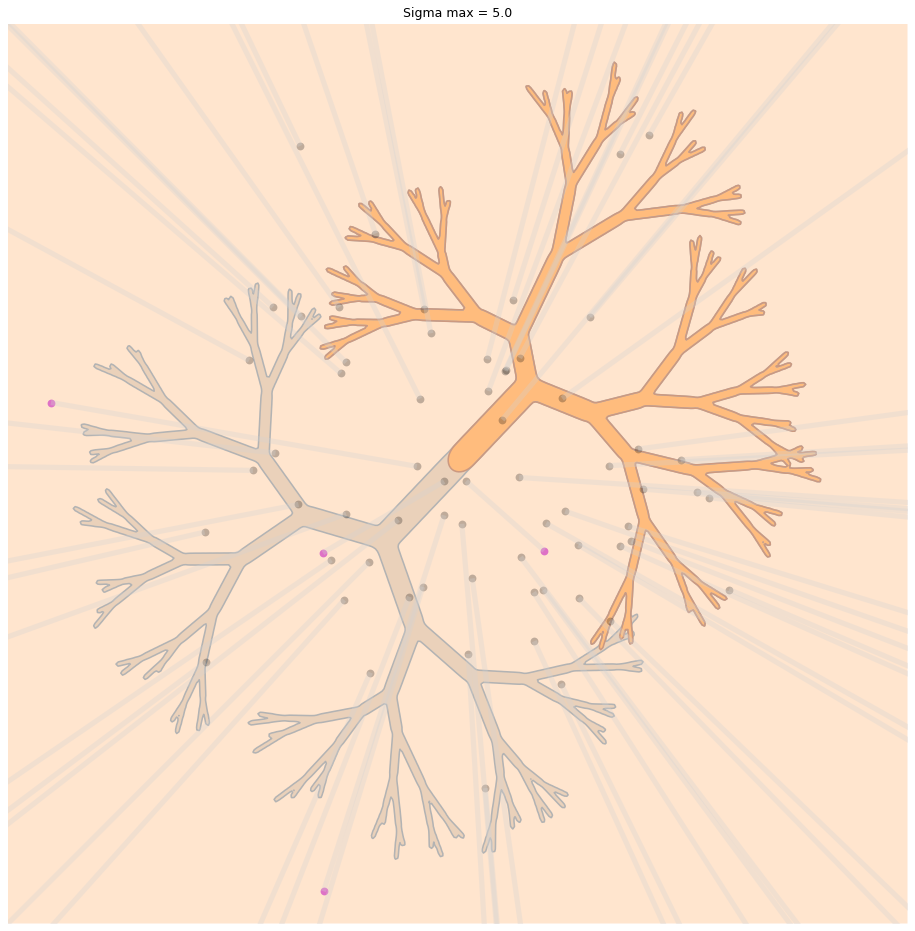

In [ ]:
for sigma_max in [0.5,1,5]:
    fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
    toy.do_plot(ema, elems={'samples_before_small',
                            'trajectories_small', 'samples',
                            'gt_smax',
                            'gt_uncond', 'gt_outline'}, 
                num_samples=1<<6, sigma_max=sigma_max, ax=ax)
    plt.title(f"Sigma max = {sigma_max:.1f}")

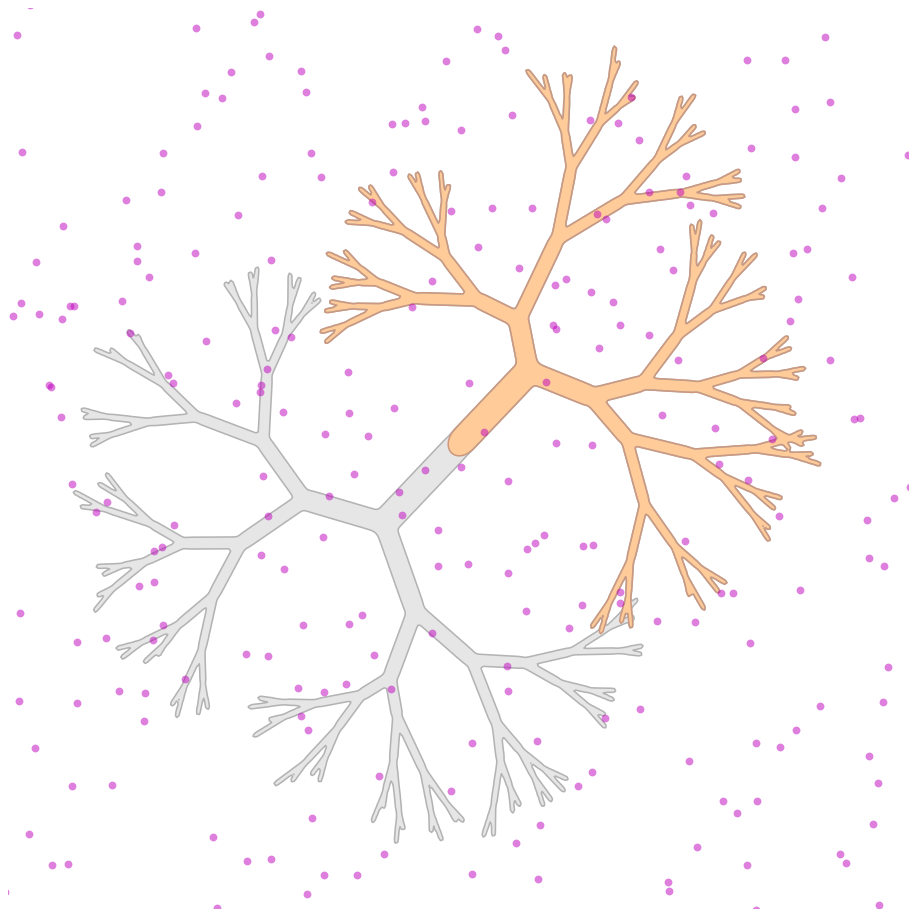

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'samples_before_small','gt_uncond', 'gt_outline'}, num_samples=1<<12, ax=ax)

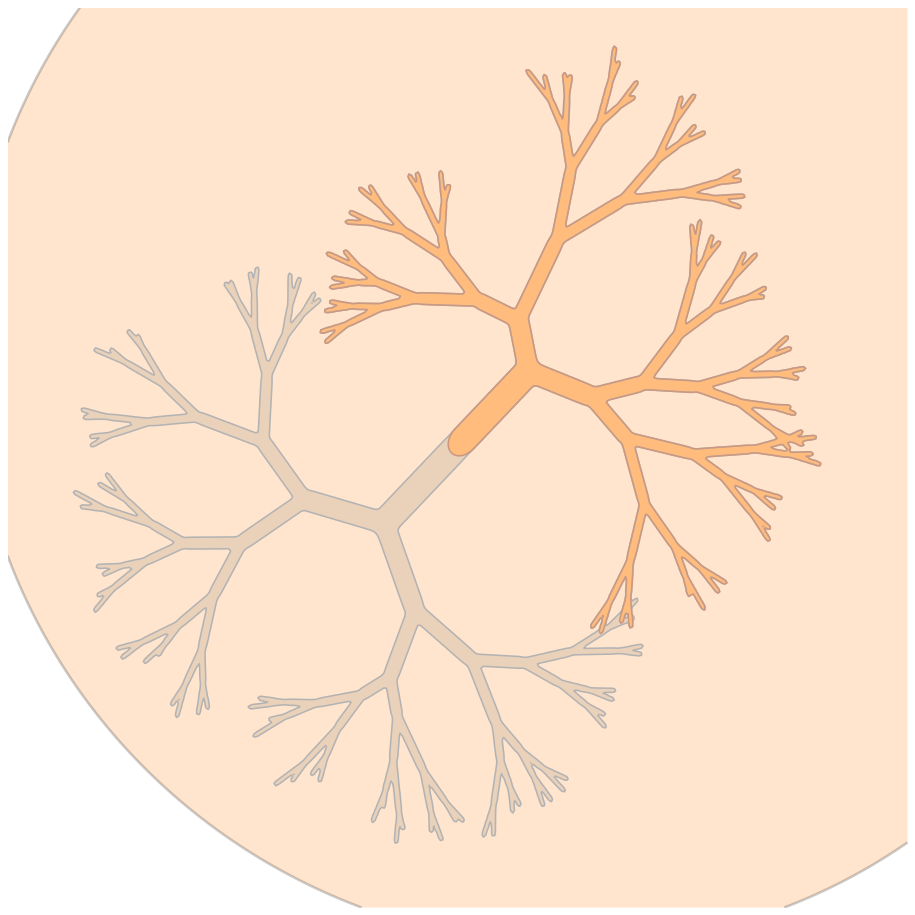

In [ ]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, elems={'gt_smax','gt_uncond', 'gt_outline'}, num_samples=1<<12, sigma_max=1, ax=ax)

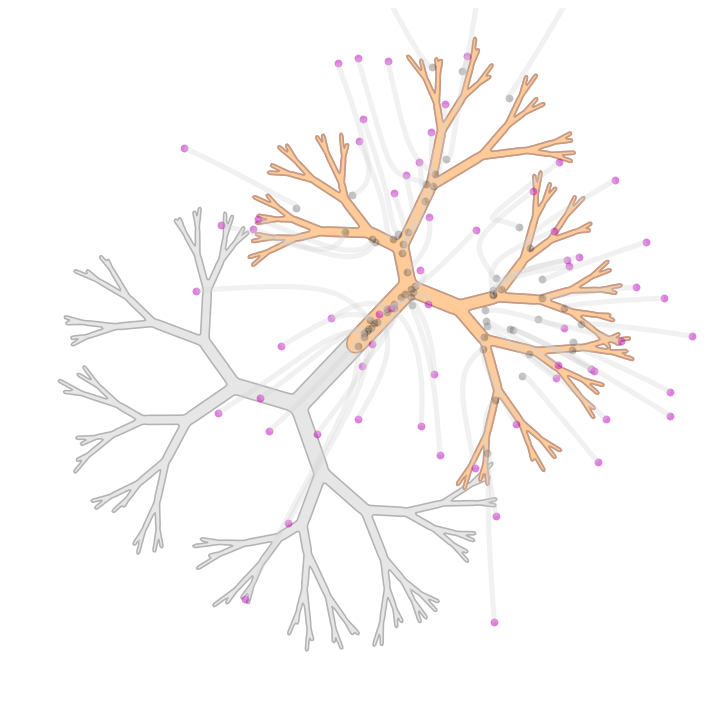

In [24]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, gnet=guide, guidance=3,
            elems={'samples_before_small', 'trajectories_small', 
                   'samples',
                   # 'gt_smax',
                   'gt_uncond', 'gt_outline'}, 
            num_samples=1<<6, sigma_max=0.65, ax=ax)
# plt.title(f"Sigma max = {sigma_max:.1f}")

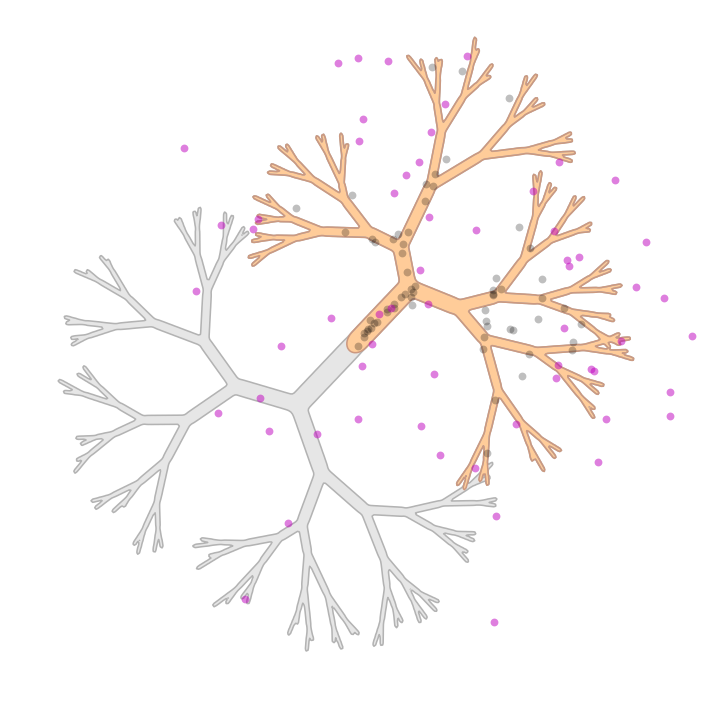

In [20]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, gnet=guide, guidance=3,
            elems={'samples_before_small', #'trajectories_small', 
                   'samples',
                   # 'gt_smax',
                   'gt_uncond', 'gt_outline'}, 
            num_samples=1<<6, sigma_max=0.65, ax=ax)
# plt.title(f"Sigma max = {sigma_max:.1f}")

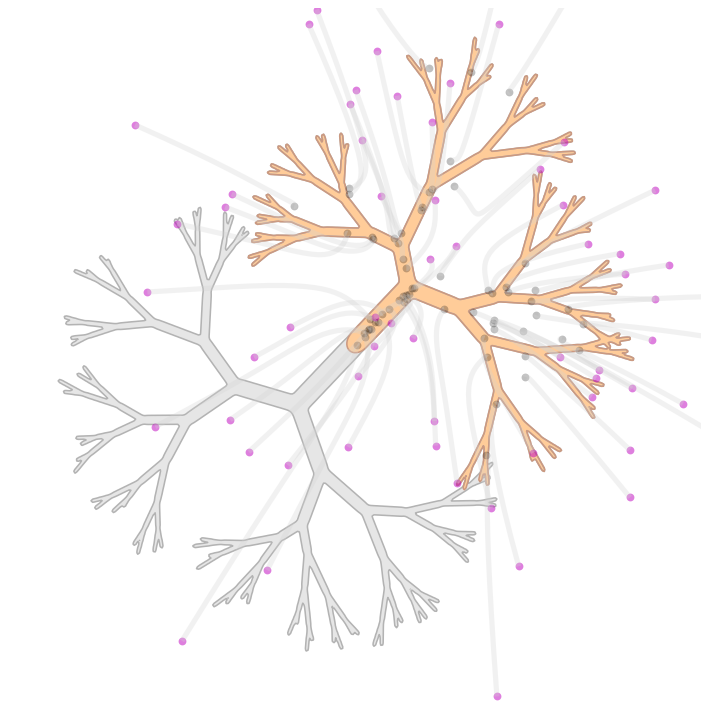

In [18]:
fig, ax = plt.subplots(figsize=[12, 12], dpi=75)
toy.do_plot(ema, gnet=guide, guidance=3,
            elems={'samples_before_small',
                        'trajectories_small', 'samples',
                        # 'gt_smax',
                        'gt_uncond', 'gt_outline'}, 
            num_samples=1<<6, sigma_max=0.8, ax=ax)
# plt.title(f"Sigma max = {sigma_max:.1f}")